In [30]:
!pip install seaborn --quiet
!pip install scikit-learn --quiet

In [31]:
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [32]:
# Load the insurance dataset
insurance = pd.read_csv("insurance.csv")

# Display first few rows of the dataset
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [33]:
# Show dataset structure
print(insurance.info())
print(insurance.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

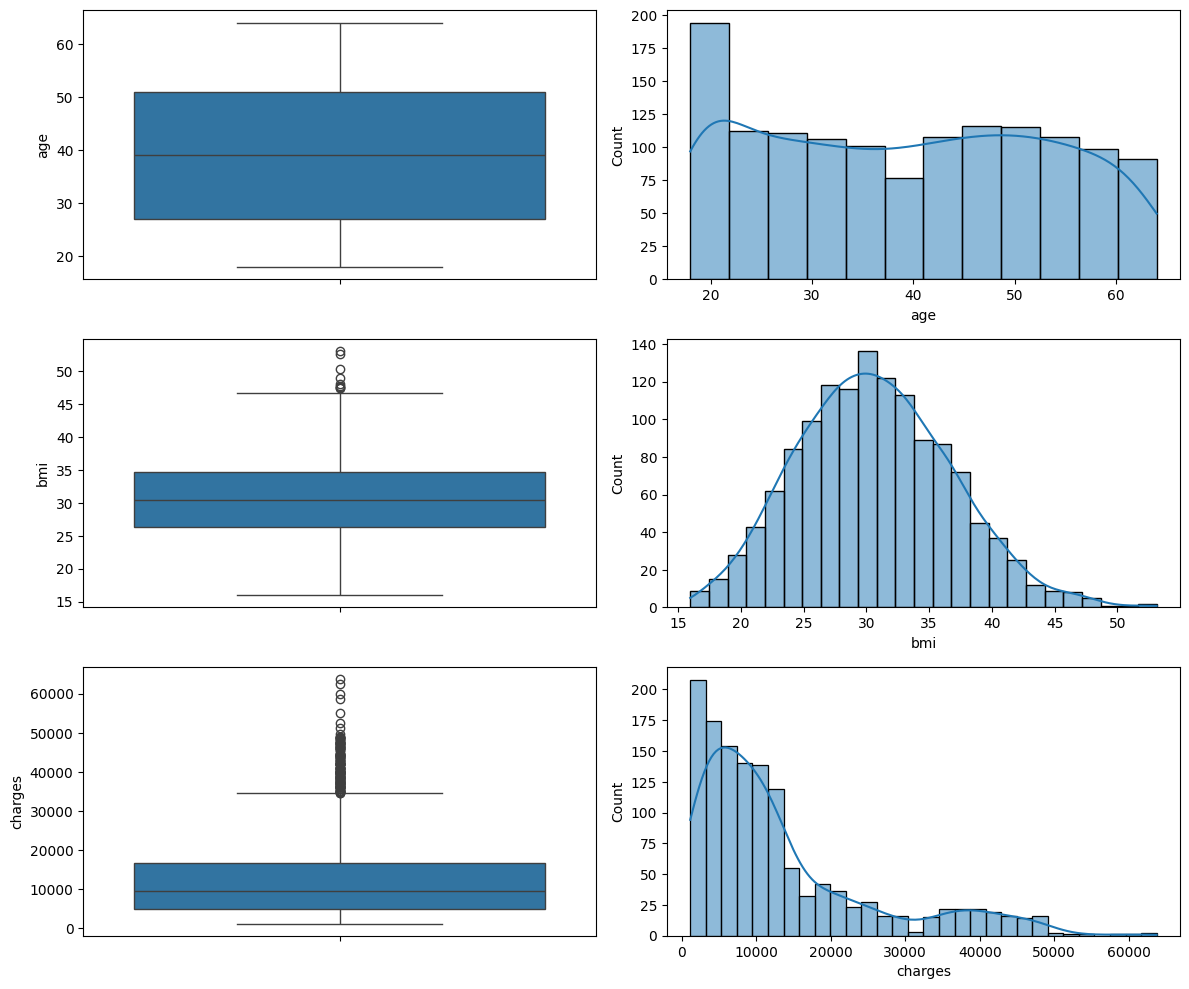

In [34]:
# Visualize distributions of numerical features
fig, axs = plt.subplots(3,2, figsize=(12,10))
sns.boxplot(insurance["age"], ax=axs[0,0])
sns.histplot(insurance["age"], ax=axs[0,1], kde=True)

sns.boxplot(insurance["bmi"], ax=axs[1,0])
sns.histplot(insurance["bmi"], ax=axs[1,1], kde=True)

sns.boxplot(insurance["charges"], ax=axs[2,0])
sns.histplot(insurance["charges"], ax=axs[2,1], kde=True)

plt.tight_layout()
plt.show()

In [35]:
# Handle outliers using IQR method
Q1 = insurance["charges"].quantile(0.25)
Q3 = insurance["charges"].quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance["charges"] >= Q1 - 1.5 * IQR) & (insurance["charges"] <= Q3 + 1.5 * IQR)]

In [36]:
# Convert categorical features to numeric using one-hot encoding
insurance = pd.get_dummies(insurance, drop_first=True)

In [37]:
# Define features and target variable
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict charges
y_pred = model.predict(X_test)

In [40]:
# Evaluate model performance
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

MAE: 2796.36956095707
MSE: 27645846.664999332
RMSE: 5257.931785883051


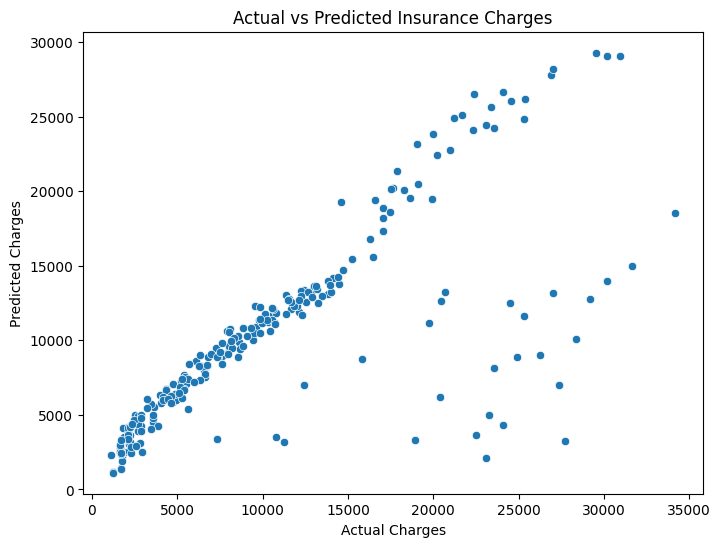

In [41]:
# Visualize actual vs predicted charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()